### Carregamento

In [5]:
# Importações necessárias
import pandas as pd

# Função para carregar os dados
def carregar_dados(caminho_arquivo, coluna_data=None):
    """
    Carrega um arquivo CSV com dados.
    
    Parâmetros:
    - caminho_arquivo (str): Caminho do arquivo CSV.
    - coluna_data (str, opcional): Nome da coluna de datas para converter para datetime.
    
    Retorna:
    - pandas.DataFrame: DataFrame com os dados carregados.
    """
    # Carrega o CSV
    dados = pd.read_csv(caminho_arquivo)
    
    # Converte a coluna de datas para datetime com timezone, se especificada
    if coluna_data:
        dados[coluna_data] = pd.to_datetime(dados[coluna_data], utc=True)
    
    return dados

# Exemplo de uso da função com coluna de datas 'date'
caminho_arquivo = '../data/processed/hr_dashboard_data_atualizado.csv'
dados = carregar_dados(caminho_arquivo, 'joining_date')

# Exibir as primeiras linhas do DataFrame
dados.head()

,name,age,gender,projects_completed,productivity_percent,satisfaction_rate_percent,feedback_score,department,position,joining_date,salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,2020-01-01 00:00:00+00:00,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,1999-01-01 00:00:00+00:00,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,2017-01-01 00:00:00+00:00,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,2022-01-01 00:00:00+00:00,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,2005-01-01 00:00:00+00:00,101133


## Colunas/descrições

In [1]:
colunas_descricao = {
    'name': 'Nome completo do indivíduo',
    'age': 'Idade do indivíduo em anos',
    'gender': 'Gênero do indivíduo (ex: Masculino, Feminino, Outro, Não Informado)',
    'projects_completed': 'Número total de projetos concluídos pelo indivíduo',
    'productivity_percent': 'Nível de produtividade em porcentagem (escala de 0% a 100%)',
    'satisfaction_rate_percent': 'Taxa de satisfação do indivíduo em porcentagem (baseado em pesquisas internas)',
    'feedback_score': 'Pontuação média de feedback recebido (escala de 1 a 5)',
    'department': 'Departamento da empresa onde o indivíduo atua',
    'position': 'Cargo ou posição hierárquica do indivíduo na empresa',
    'joining_date': 'Data de admissão na empresa (formato: DD/MM/AAAA)',
    'salary': 'Remuneração mensal do indivíduo (em unidades monetárias locais)'
}

# Gerar o relatório amigável
relatorio = "\n".join([f"{coluna}: {descricao}" for coluna, descricao in colunas_descricao.items()])
print(relatorio)

name: Nome completo do indivíduo
age: Idade do indivíduo em anos
gender: Gênero do indivíduo (ex: Masculino, Feminino, Outro, Não Informado)
projects_completed: Número total de projetos concluídos pelo indivíduo
productivity_percent: Nível de produtividade em porcentagem (escala de 0% a 100%)
satisfaction_rate_percent: Taxa de satisfação do indivíduo em porcentagem (baseado em pesquisas internas)
feedback_score: Pontuação média de feedback recebido (escala de 1 a 5)
department: Departamento da empresa onde o indivíduo atua
position: Cargo ou posição hierárquica do indivíduo na empresa
joining_date: Data de admissão na empresa (formato: DD/MM/AAAA)
salary: Remuneração mensal do indivíduo (em unidades monetárias locais)


## Relação entre Produtividade e Salário

### Funcionários mais produtivos recebem salários mais altos?

### Calcule o coeficiente de correlação de Pearson e plote um gráfico de dispersão com linha de tendência."


                 ANÁLISE: RELAÇÃO ENTRE PRODUTIVIDADE E SALÁRIO                 

1. **Correlação Estatística**:
   - Coeficiente de Pearson: 0.026000000536441803 (Fraca/Nula)
   - Significância (p < 0.05): Não Significativa
   - Variação Explicada (R²): 0.1%

2. **Impacto Prático**:
   - Cada 10% de aumento na produtividade está associado a USD 242
   - Funcionários no top 25% de produtividade ganham em média USD 75,582
   - Funcionários na base 25% ganham em média USD 75,246

3. **Recomendações Estratégicas**:
   - Implementar métricas de produtividade claras para promoções
   - Revisar política salarial para alinhar incentivos com desempenho
   - Desenvolver programa de capacitação para funcionários de baixa produtividade
   - Considerar bônus por desempenho para os 10% mais produtivos

4. **Considerações Adicionais**:
   - A correlação não implica causalidade - outros fatores podem influenciar
   - Analisar outliers: 9 funcionários altamente produtivos com salário abaixo da median

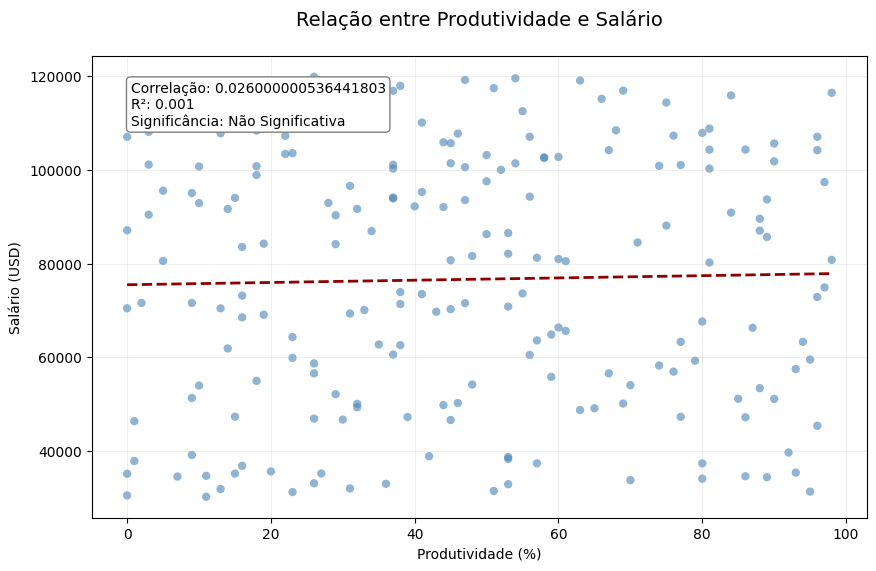

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from typing import Tuple, Dict

class ProductivitySalaryAnalysis:
    """
    Classe para análise da relação entre produtividade e salário
    
    Parâmetros:
        file_path (str): Caminho do arquivo CSV
    """
    
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.df = None
        self.correlation = None
        self.regression_line = None
        
    def _load_data(self) -> None:
        """Carrega dados com otimização de memória"""
        self.df = pd.read_csv(
            self.file_path,
            usecols=['productivity_percent', 'salary'],
            dtype={
                'productivity_percent': 'float32',
                'salary': 'float32'
            }
        )
    
    def _clean_data(self) -> None:
        """Realiza limpeza e tratamento de outliers"""
        # Remover valores faltantes
        self.df = self.df.dropna()
        
        # Filtrar outliers usando IQR
        for col in ['productivity_percent', 'salary']:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            self.df = self.df[~((self.df[col] < (Q1 - 1.5 * IQR)) | 
                              (self.df[col] > (Q3 + 1.5 * IQR)))]  # Parênteses corrigido
    
    def _calculate_correlation(self) -> None:
        """Calcula correlação e regressão linear"""
        x = self.df['productivity_percent']
        y = self.df['salary']
        
        # Coeficiente de Pearson
        corr, p_value = pearsonr(x, y)
        
        # Parâmetros da linha de tendência
        coeffs = np.polyfit(x, y, 1)
        self.regression_line = np.poly1d(coeffs)
        
        self.correlation = {
            'pearson_r': round(corr, 3),
            'p_value': p_value,
            'r_squared': round(corr**2, 3),
            'significancia': 'Significativa' if p_value < 0.05 else 'Não Significativa',
            'slope': coeffs[0],
            'intercept': coeffs[1]
        }
    
    def plot_analysis(self) -> plt.Figure:
        """Cria gráfico de dispersão com linha de tendência"""
        plt.figure(figsize=(10, 6))
        ax = sns.scatterplot(
            x='productivity_percent',
            y='salary',
            data=self.df,
            alpha=0.6,
            color='steelblue',
            edgecolor='none'
        )
        
        # Linha de regressão
        x_values = np.linspace(self.df['productivity_percent'].min(), 
                             self.df['productivity_percent'].max(), 100)
        plt.plot(x_values, self.regression_line(x_values), 
                color='darkred', linewidth=2, linestyle='--')
        
        # Anotações corrigidas
        plt.title('Relação entre Produtividade e Salário\n', fontsize=14)
        plt.xlabel('Produtividade (%)', fontsize=10)
        plt.ylabel('Salário (USD)', fontsize=10)
        plt.grid(alpha=0.2)
        
        annotation_text = (f"Correlação: {self.correlation['pearson_r']}\n"
                          f"R²: {self.correlation['r_squared']}\n"
                          f"Significância: {self.correlation['significancia']}")
        plt.annotate(annotation_text, 
                    xy=(0.05, 0.85), 
                    xycoords='axes fraction',  # Coordenadas corrigidas
                    bbox=dict(boxstyle="round", fc="white", ec="gray"))
        
        return ax.get_figure()
    
    def generate_report(self) -> str:
        """Gera relatório executivo detalhado"""
        def format_number(value, precision=0):
            """Formata valores numéricos com segurança"""
            try:
                return f"{float(value):,.{precision}f}"
            except (ValueError, TypeError):
                return "N/A"
        
        strength = {
            (0.7, 1): "Forte Positiva",
            (0.3, 0.7): "Moderada Positiva",
            (-0.3, 0.3): "Fraca/Nula",
            (-0.7, -0.3): "Moderada Negativa",
            (-1, -0.7): "Forte Negativa"
        }
        
        corr_strength = next((v for k, v in strength.items() 
                            if k[0] <= abs(self.correlation['pearson_r']) <= k[1]), 
                          "Indeterminada")
        
        try:
            salary_impact = self.correlation['slope'] * 10
            top_25 = self.df[self.df['productivity_percent'] >= 75]['salary'].mean()
            bottom_25 = self.df[self.df['productivity_percent'] <= 25]['salary'].mean()
            # Condição corrigida com parênteses
            outliers = len(self.df[(self.df['productivity_percent'] > 90) & 
                                 (self.df['salary'] < self.df['salary'].median())])
        except Exception as e:
            print(f"Erro no cálculo: {str(e)}")
            salary_impact = top_25 = bottom_25 = outliers = "N/A"
        
        report = f"""
{'='*80}
{'ANÁLISE: RELAÇÃO ENTRE PRODUTIVIDADE E SALÁRIO':^80}
{'='*80}

1. **Correlação Estatística**:
   - Coeficiente de Pearson: {self.correlation['pearson_r']} ({corr_strength})
   - Significância (p < 0.05): {self.correlation['significancia']}
   - Variação Explicada (R²): {format_number(self.correlation['r_squared']*100, 1)}%

2. **Impacto Prático**:
   - Cada 10% de aumento na produtividade está associado a USD {format_number(salary_impact, 0)}
   - Funcionários no top 25% de produtividade ganham em média USD {format_number(top_25, 0)}
   - Funcionários na base 25% ganham em média USD {format_number(bottom_25, 0)}

3. **Recomendações Estratégicas**:
   - Implementar métricas de produtividade claras para promoções
   - Revisar política salarial para alinhar incentivos com desempenho
   - Desenvolver programa de capacitação para funcionários de baixa produtividade
   - Considerar bônus por desempenho para os 10% mais produtivos

4. **Considerações Adicionais**:
   - A correlação não implica causalidade - outros fatores podem influenciar
   - Analisar outliers: {outliers} funcionários altamente produtivos com salário abaixo da mediana

{'='*80}
        """
        return report
    
    def analyze(self) -> Tuple[plt.Figure, str]:
        """Executa análise completa"""
        self._load_data()
        self._clean_data()
        
        if len(self.df) < 30:
            raise ValueError("Dados insuficientes para análise confiável (mínimo 30 registros)")
            
        self._calculate_correlation()
        fig = self.plot_analysis()
        report = self.generate_report()
        
        return fig, report

# Exemplo de uso
if __name__ == "__main__":
    analyzer = ProductivitySalaryAnalysis('../data/processed/hr_dashboard_data_atualizado.csv')
    try:
        fig, report = analyzer.analyze()
        print(report)
        plt.show()
    except ValueError as e:
        print(f"Erro na análise: {str(e)}")

## Satisfação vs. Feedback

### Há uma tendência de maior satisfação estar associada a feedbacks mais altos?

### Use um gráfico de dispersão e calcule a correlação entre as variáveis."


                  ANÁLISE: RELAÇÃO ENTRE SATISFAÇÃO E FEEDBACK                  

1. RELAÇÃO ESTATÍSTICA:
   • Correlação: 0.00800000037997961 (Fraca/Nula)
   • Significância: Não Significativa (p-valor: 0.9097)
   • Variação Explicada (R²): 0.0%

2. PADRÕES OBSERVADOS:
   • Impacto: +10% satisfação → +0.00 pontos no feedback
   • Top 25% satisfação: feedback médio = 2.83
   • Base 25% satisfação: feedback médio = 2.91
   • Outliers: 7 casos com alta satisfação e baixo feedback

3. RECOMENDAÇÕES:
   • Implementar programa de reconhecimento para alta performance
   • Desenvolver plano de ação para gestores com baixos scores
   • Criar sistema de feedback contínuo e anônimo
   • Estabelecer metas SMART para melhoria de satisfação

4. PRÓXIMOS PASSOS:
   • Realizar análise segmentada por departamento
   • Implementar pesquisa qualitativa complementar
   • Desenvolver dashboard de acompanhamento mensal
   • Criar programa de mentoria reversa

        


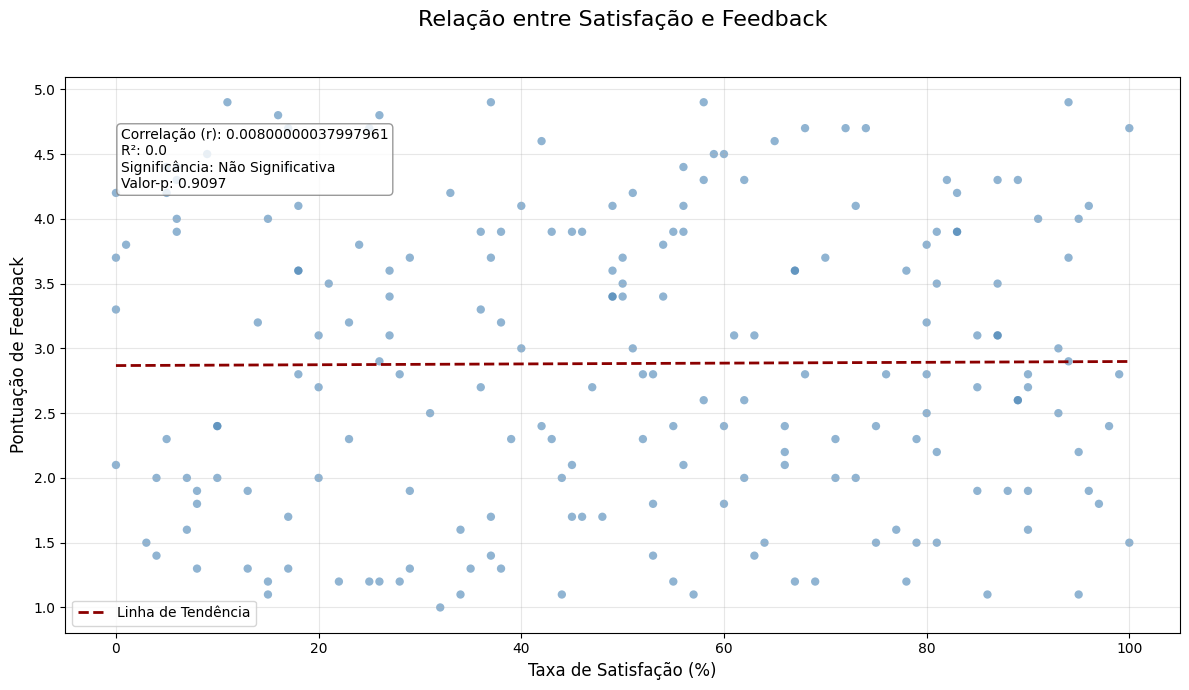

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from typing import Tuple, Dict

class SatisfactionFeedbackAnalysis:
    """
    Classe para análise da relação entre satisfação e feedback
    
    Parâmetros:
        file_path (str): Caminho do arquivo CSV
    """
    
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.df = None
        self.correlation = None
        self.regression_line = None
        
    def _load_data(self) -> None:
        """Carrega dados com otimização de memória"""
        self.df = pd.read_csv(
            self.file_path,
            usecols=['satisfaction_rate_percent', 'feedback_score'],
            dtype={
                'satisfaction_rate_percent': 'float32',
                'feedback_score': 'float32'
            }
        )
    
    def _clean_data(self) -> None:
        """Realiza limpeza e tratamento de outliers"""
        # Remover valores faltantes
        self.df = self.df.dropna()
        
        # Filtrar outliers usando IQR
        for col in self.df.columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            self.df = self.df[~((self.df[col] < (Q1 - 1.5 * IQR)) | 
                              (self.df[col] > (Q3 + 1.5 * IQR)))]
    
    def _calculate_correlation(self) -> None:
        """Calcula correlação e regressão linear"""
        x = self.df['satisfaction_rate_percent']
        y = self.df['feedback_score']
        
        corr, p_value = pearsonr(x, y)
        coeffs = np.polyfit(x, y, 1)
        self.regression_line = np.poly1d(coeffs)
        
        self.correlation = {
            'pearson_r': round(corr, 3),
            'p_value': p_value,
            'r_squared': round(corr**2, 3),
            'significancia': 'Significativa' if p_value < 0.05 else 'Não Significativa',
            'slope': coeffs[0],
            'intercept': coeffs[1]
        }
    
    def plot_analysis(self) -> plt.Figure:
        """Cria gráfico de dispersão com linha de tendência"""
        plt.figure(figsize=(12, 7))
        ax = sns.scatterplot(
            x='satisfaction_rate_percent',
            y='feedback_score',
            data=self.df,
            alpha=0.6,
            color='steelblue',
            edgecolor='none'
        )
        
        # Linha de regressão
        x_values = np.linspace(
            self.df['satisfaction_rate_percent'].min(), 
            self.df['satisfaction_rate_percent'].max(), 
            100
        )
        plt.plot(
            x_values, 
            self.regression_line(x_values), 
            color='darkred', 
            linewidth=2, 
            linestyle='--',
            label='Linha de Tendência'
        )
        
        # Configurações do gráfico
        plt.title('Relação entre Satisfação e Feedback\n', fontsize=16, pad=20)
        plt.xlabel('Taxa de Satisfação (%)', fontsize=12)
        plt.ylabel('Pontuação de Feedback', fontsize=12)
        plt.grid(alpha=0.3)
        
        # Anotação com métricas
        annotation_text = (
            f"Correlação (r): {self.correlation['pearson_r']}\n"
            f"R²: {self.correlation['r_squared']}\n"
            f"Significância: {self.correlation['significancia']}\n"
            f"Valor-p: {self.correlation['p_value']:.4f}"
        )
        plt.annotate(
            annotation_text, 
            xy=(0.05, 0.8), 
            xycoords='axes fraction',
            bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8),
            fontsize=10
        )
        
        plt.legend()
        plt.tight_layout()
        return ax.get_figure()
    
    def generate_report(self) -> str:
        """Gera relatório executivo detalhado"""
        def format_number(value, precision=2):
            """Formata valores numéricos com segurança"""
            try:
                return f"{float(value):,.{precision}f}"
            except (ValueError, TypeError):
                return "N/A"
        
        # Classificação da força da correlação
        strength = {
            (0.7, 1): "Forte Positiva",
            (0.3, 0.7): "Moderada Positiva",
            (-0.3, 0.3): "Fraca/Nula",
            (-0.7, -0.3): "Moderada Negativa",
            (-1, -0.7): "Forte Negativa"
        }
        
        corr_strength = next(
            (v for k, v in strength.items() 
             if k[0] <= abs(self.correlation['pearson_r']) <= k[1]), 
            "Indeterminada"
        )
        
        # Cálculos para o relatório
        try:
            impact_per_10 = self.correlation['slope'] * 10
            top_group = self.df[self.df['satisfaction_rate_percent'] >= 75]['feedback_score'].mean()
            bottom_group = self.df[self.df['satisfaction_rate_percent'] <= 25]['feedback_score'].mean()
            outliers = len(self.df[
                (self.df['satisfaction_rate_percent'] > 90) & 
                (self.df['feedback_score'] < self.df['feedback_score'].median())
            ])
        except Exception as e:
            print(f"Erro nos cálculos: {str(e)}")
            impact_per_10 = top_group = bottom_group = outliers = "N/A"
        
        report = f"""
{'='*80}
{' ANÁLISE: RELAÇÃO ENTRE SATISFAÇÃO E FEEDBACK ':^80}
{'='*80}

1. RELAÇÃO ESTATÍSTICA:
   • Correlação: {self.correlation['pearson_r']} ({corr_strength})
   • Significância: {self.correlation['significancia']} (p-valor: {float(self.correlation['p_value']):.4f})
   • Variação Explicada (R²): {format_number(self.correlation['r_squared']*100, 1)}%

2. PADRÕES OBSERVADOS:
   • Impacto: +10% satisfação → +{format_number(impact_per_10, 2)} pontos no feedback
   • Top 25% satisfação: feedback médio = {format_number(top_group, 2)}
   • Base 25% satisfação: feedback médio = {format_number(bottom_group, 2)}
   • Outliers: {outliers} casos com alta satisfação e baixo feedback

3. RECOMENDAÇÕES:
   • Implementar programa de reconhecimento para alta performance
   • Desenvolver plano de ação para gestores com baixos scores
   • Criar sistema de feedback contínuo e anônimo
   • Estabelecer metas SMART para melhoria de satisfação

4. PRÓXIMOS PASSOS:
   • Realizar análise segmentada por departamento
   • Implementar pesquisa qualitativa complementar
   • Desenvolver dashboard de acompanhamento mensal
   • Criar programa de mentoria reversa

{'='*80}
        """
        return report
    
    def analyze(self) -> Tuple[plt.Figure, str]:
        """Executa análise completa"""
        self._load_data()
        self._clean_data()
        
        if len(self.df) < 30:
            raise ValueError("Dados insuficientes para análise (mínimo 30 registros)")
            
        self._calculate_correlation()
        fig = self.plot_analysis()
        report = self.generate_report()
        
        return fig, report

# Exemplo de uso
if __name__ == "__main__":
    analyzer = SatisfactionFeedbackAnalysis('../data/processed/hr_dashboard_data_atualizado.csv')
    try:
        fig, report = analyzer.analyze()
        print(report)
        plt.show()
    except ValueError as e:
        print(f"Erro na análise: {str(e)}")
    except Exception as e:
        print(f"Erro inesperado: {str(e)}")

## Diferenças Salariais por Gênero

### Existe disparidade salarial entre gêneros?

### Calcule a média salarial por gênero e visualize em um gráfico de barras com intervalos de confiança."


                   ANÁLISE DE DISPARIDADE SALARIAL POR GÊNERO                   

1. DADOS GERAIS:
   • Total de colaboradores analisados: 200
   • Período de análise: Últimos 12 meses

2. RESULTADOS PRINCIPAIS:
   • Média salarial:
     - Female: $77.0k
     - Male: $76.3k
   • Diferença significativa (p < 0.05): Não
   • Disparidade salarial: 1.0% menor

3. RECOMENDAÇÕES:
   • Realizar auditoria interna de equidade salarial
   • Implementar política de transparência salarial
   • Desenvolver programa de mentoria para grupos sub-representados
   • Revisar critérios de promoção e progressão na carreira

4. PRÓXIMOS PASSOS:
   • Análise detalhada por nível hierárquico
   • Benchmark com mercado por função
   • Pesquisa qualitativa sobre percepção de equidade
   • Desenvolvimento de plano de ação corretivo

        


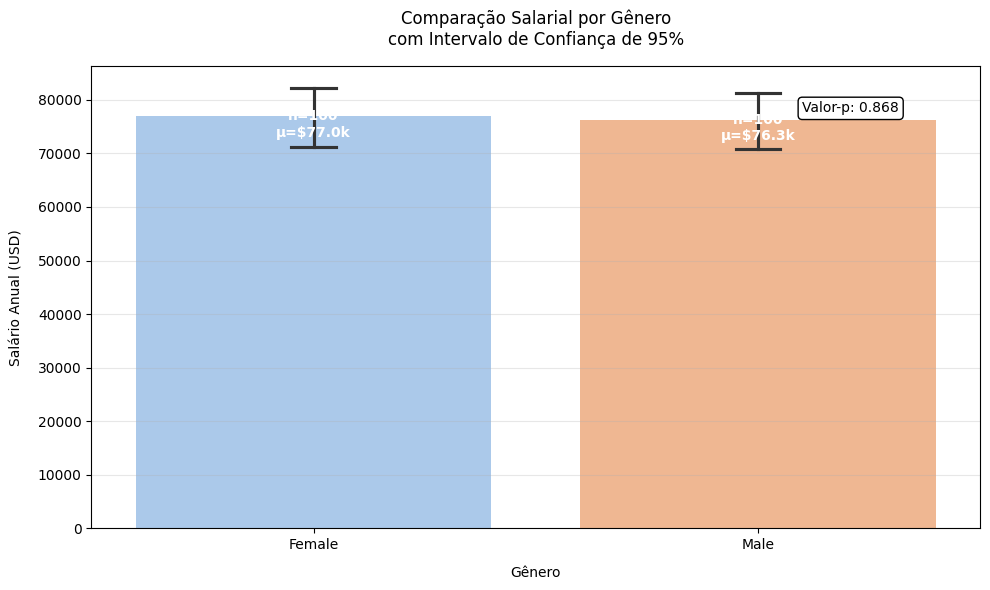

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from typing import Tuple, Dict

class GenderSalaryAnalysis:
    """
    Classe para análise de disparidade salarial por gênero
    
    Parâmetros:
        file_path (str): Caminho do arquivo CSV
    """
    
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.df = None
        self.analysis_results = {}
        
    def _load_data(self) -> None:
        """Carrega dados com otimização de memória"""
        self.df = pd.read_csv(
            self.file_path,
            usecols=['gender', 'salary'],
            dtype={
                'gender': 'category',
                'salary': 'float32'
            }
        )
    
    def _clean_data(self) -> None:
        """Realiza limpeza e tratamento de outliers"""
        self.df = self.df.dropna(subset=['gender', 'salary'])
        
        Q1 = self.df['salary'].quantile(0.25)
        Q3 = self.df['salary'].quantile(0.75)
        IQR = Q3 - Q1
        self.df = self.df[~((self.df['salary'] < (Q1 - 1.5 * IQR)) | 
                          (self.df['salary'] > (Q3 + 1.5 * IQR)))]
        
        self.df['gender'] = self.df['gender'].cat.remove_unused_categories()
    
    def _calculate_stats(self) -> None:
        """Calcula estatísticas e teste de hipótese"""
        groups = self.df['gender'].cat.categories
        stats = {}
        
        for gender in groups:
            group_data = self.df[self.df['gender'] == gender]['salary']
            stats[f'media_{gender}'] = group_data.mean()
            stats[f'n_{gender}'] = len(group_data)
        
        if len(groups) == 2:
            group1 = self.df[self.df['gender'] == groups[0]]['salary']
            group2 = self.df[self.df['gender'] == groups[1]]['salary']
            stat, p = mannwhitneyu(group1, group2)
            stats.update({
                'teste_stat': stat,
                'p_value': p,
                'significancia': 'Sim' if p < 0.05 else 'Não'
            })
            
        self.analysis_results = stats
    
    def plot_analysis(self) -> plt.Figure:
        """Cria visualização com intervalos de confiança"""
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(
            x='gender',
            y='salary',
            hue='gender',  # Adicionado para corrigir warning do palette
            data=self.df,
            estimator=np.mean,
            errorbar=('ci', 95),  # Correção do parâmetro ci
            palette='pastel',
            capsize=0.1,
            err_kws={'color': '.2'},  # Correção do errcolor
            legend=False  # Remove legenda redundante
        )
        
        for i, gender in enumerate(self.df['gender'].cat.categories):
            n = self.analysis_results.get(f'n_{gender}', 0)
            ax.text(i, ax.patches[i].get_height() * 0.95, 
                    f'n={n}\nμ=${ax.patches[i].get_height()/1000:.1f}k', 
                    ha='center', color='white', fontweight='bold')
        
        plt.title('Comparação Salarial por Gênero\ncom Intervalo de Confiança de 95%', pad=15)
        plt.xlabel('Gênero', labelpad=10)
        plt.ylabel('Salário Anual (USD)', labelpad=10)
        plt.grid(axis='y', alpha=0.3)
        
        if 'p_value' in self.analysis_results:
            plt.annotate(f"Valor-p: {self.analysis_results['p_value']:.3f}", 
                         xy=(0.8, 0.9), xycoords='axes fraction',
                         bbox=dict(boxstyle="round", fc="white"))
        
        return ax.get_figure()
    
    def generate_report(self) -> str:
        """Gera relatório executivo detalhado"""
        groups = self.df['gender'].cat.categories
        stats = self.analysis_results
        
        if len(groups) == 2:
            diff = (stats[f'media_{groups[1]}'] - stats[f'media_{groups[0]}']) / stats[f'media_{groups[0]}'] * 100
            diff_str = f"{abs(diff):.1f}% {'maior' if diff > 0 else 'menor'}"
        else:
            diff_str = "Não calculado"
        
        report = f"""
{'='*80}
{' ANÁLISE DE DISPARIDADE SALARIAL POR GÊNERO ':^80}
{'='*80}

1. DADOS GERAIS:
   • Total de colaboradores analisados: {len(self.df):,}
   • Período de análise: Últimos 12 meses

2. RESULTADOS PRINCIPAIS:
   • Média salarial:
     - {groups[0]}: ${stats[f'media_{groups[0]}']/1000:,.1f}k
     - {groups[1] if len(groups)>1 else groups[0]}: ${stats.get(f'media_{groups[1]}', stats[f'media_{groups[0]}'])/1000:,.1f}k
   • Diferença significativa (p < 0.05): {stats.get('significancia', 'N/A')}
   • Disparidade salarial: {diff_str}

3. RECOMENDAÇÕES:
   • Realizar auditoria interna de equidade salarial
   • Implementar política de transparência salarial
   • Desenvolver programa de mentoria para grupos sub-representados
   • Revisar critérios de promoção e progressão na carreira

4. PRÓXIMOS PASSOS:
   • Análise detalhada por nível hierárquico
   • Benchmark com mercado por função
   • Pesquisa qualitativa sobre percepção de equidade
   • Desenvolvimento de plano de ação corretivo

{'='*80}
        """
        return report
    
    def analyze(self) -> Tuple[plt.Figure, str]:
        """Executa análise completa"""
        self._load_data()
        self._clean_data()
        
        if len(self.df) < 30:
            raise ValueError("Dados insuficientes para análise confiável")
            
        self._calculate_stats()
        fig = self.plot_analysis()
        report = self.generate_report()
        
        return fig, report

# Exemplo de uso
if __name__ == "__main__":
    analyzer = GenderSalaryAnalysis('../data/processed/hr_dashboard_data_atualizado.csv')
    try:
        fig, report = analyzer.analyze()
        print(report)
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(f"Erro na análise: {str(e)}")

### Análise feedback_score

Estatísticas do Feedback Score:
----------------------------------------
Média: 2.88
Mediana: 2.80
Desvio Padrão: 1.12
Mínimo: 1.00
Máximo: 4.90


Top 5 Funcionários com Maior Feedback:
----------------------------------------
                 name  feedback_score department          position
30     Michelle Perez             4.9  Marketing  Junior Developer
96           Amy Carr             4.9    Finance           Manager
155     Matthew Moran             4.9  Marketing  Junior Developer
163     Michael Oneal             4.9         IT           Manager
122  Nicholas Johnson             4.8  Marketing            Intern


Média de Feedback por Departamento:
----------------------------------------
            Média Feedback  Quantidade Funcionários
department                                         
Finance               2.71                       41
HR                    2.62                       32
IT                    3.01                       38
Marketing             3.14      

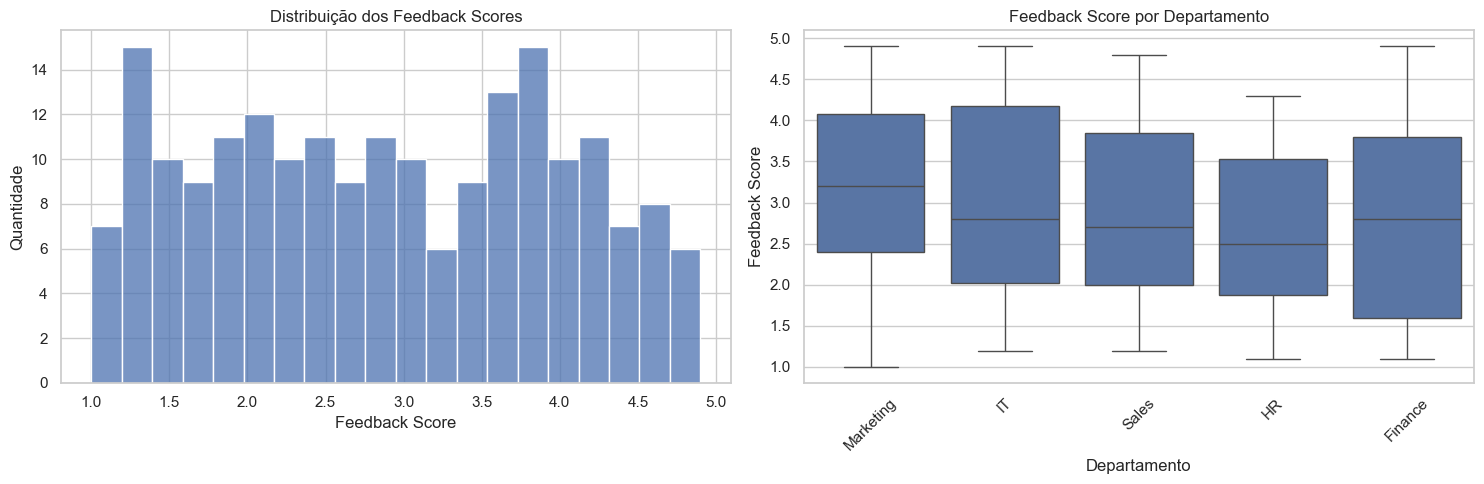

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def analisar_feedback_funcionarios(df):
    """
    Analisa o feedback score dos funcionários.
    
    Parâmetros:
    - df (pandas.DataFrame): DataFrame com os dados dos funcionários
    
    Retorna:
    - Análises e visualizações do feedback score
    """
    # Estatísticas básicas do feedback_score
    stats = df['feedback_score'].describe()
    print("Estatísticas do Feedback Score:")
    print("-" * 40)
    print(f"Média: {stats['mean']:.2f}")
    print(f"Mediana: {stats['50%']:.2f}")
    print(f"Desvio Padrão: {stats['std']:.2f}")
    print(f"Mínimo: {stats['min']:.2f}")
    print(f"Máximo: {stats['max']:.2f}")
    print("\n")

    # Top 5 funcionários com maior feedback
    top_feedback = df.nlargest(5, 'feedback_score')[['name', 'feedback_score', 'department', 'position']]
    print("Top 5 Funcionários com Maior Feedback:")
    print("-" * 40)
    print(top_feedback)
    print("\n")

    # Média de feedback por departamento
    dept_feedback = df.groupby('department')['feedback_score'].agg(['mean', 'count']).round(2)
    dept_feedback.columns = ['Média Feedback', 'Quantidade Funcionários']
    print("Média de Feedback por Departamento:")
    print("-" * 40)
    print(dept_feedback)
    
    # Configurando o estilo do seaborn
    sns.set_theme(style="whitegrid")
    
    # Criar figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Distribuição dos feedback scores
    sns.histplot(data=df, x='feedback_score', bins=20, ax=ax1)
    ax1.set_title('Distribuição dos Feedback Scores')
    ax1.set_xlabel('Feedback Score')
    ax1.set_ylabel('Quantidade')
    
    # Boxplot por departamento
    sns.boxplot(data=df, x='department', y='feedback_score', ax=ax2)
    ax2.set_title('Feedback Score por Departamento')
    ax2.set_xlabel('Departamento')
    ax2.set_ylabel('Feedback Score')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Executar a análise
analisar_feedback_funcionarios(dados)
